### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [1]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-07 17:34:21--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 100.42K  --.-KB/s    in 0.04s   

2025-11-07 17:34:22 (2.52 MB/s) - ‘test.csv’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [2]:
import pandas as pd

data = pd.read_csv('test.csv')

3. Извлечь столбец с текстами (макс. балл == 1)

In [3]:
texts = data['text']

4. Построить Bag-of-Words (макс. балл == 3)

In [4]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 73.5 MB/s eta 0:00:00



Токены:
[['trying', 'to', 'have', 'a', 'conversation', 'with', 'my', 'dad', 'about', 'vegetarianism', 'is', 'the', 'most', 'pointless', 'infuriating', 'thing', 'ever', 'caveman'], ['latestnews', '4', 'newmexico', 'politics', 'nativeamerican', 'israel', 'palestine', 'protesting', 'rise', 'of', 'altright', 'at'], ['user', 'you', 'are', 'a', 'stand', 'up', 'guy', 'and', 'a', 'gentleman', 'vice', 'president', 'pence'], ['user', 'user', 'user', 'looks', 'like', 'flynn', 'isnt', 'too', 'pleased', 'with', 'me', 'he', 'blocked', 'me', 'you', 'blocked', 'by', 'flynn', 'too', 'user'], ['perfect', 'pussy', 'clips', 'vanessa', 'hudgens', 'zac', 'efron', 'naked'], ['im', 'not', 'even', 'catholic', 'but', 'pope', 'francis', 'is', 'my', 'dude', 'like', 'i', 'just', 'need', 'him', 'to', 'hug', 'me', 'and', 'tell', 'me', 'everything', 'is', 'okay'], ['user', 'for', 'al', 'the', 'crying', 'you', 'do', 'about', 'how', 'middle', 'america', 'is', 'left', 'outthey', 'have', 'twice', 'as', 'much', 'voting',

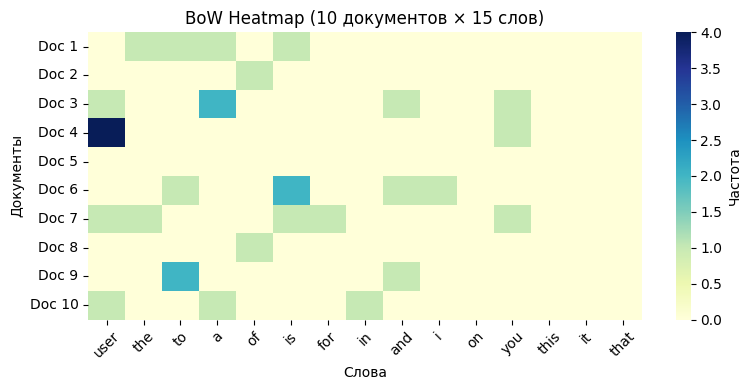

In [8]:
# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)
# - Постройте словарь
# - Преобразуйте документы в BoW векторы
import pandas as pd
import re
import gensim
from gensim import corpora
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# очистка текста
def cleaning(text):
    text = text.lower()  # к нижнему регистру
    text = re.sub(r'[^\w\s]', '', text)  # удалить все, кроме букв, цифр и пробелв
    return text

clean_texts = [cleaning(text) for text in texts]

# токенизация
tokens = [text.split() for text in clean_texts]
print(f'\nТокены:\n{tokens}')

# словарь
dictionary = corpora.Dictionary(tokens)
print(f"\nСловарь:\n{dictionary.token2id}")

#Bag-of-words
bow_corpus = [dictionary.doc2bow(doc) for doc in tokens]
print("\nBag-of-Words векторы (индекс_слова: частота) (для первых 10 документов): ")
count = 10
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")
    count -= 1
    if count == 0:
        break

# векторы
def bow_to_dense(bow_corpus, dictionary):
    dense = []
    for doc in bow_corpus:
        vec = [0] * len(dictionary)
        for word_id, freq in doc:
            vec[word_id] = freq
        dense.append(vec)
    return dense
bow_dense = bow_to_dense(bow_corpus, dictionary)
bow_matrix = np.array(bow_dense)

# Самые частотные слова
word_freq = np.sum(bow_matrix, axis=0)
freq_df = pd.DataFrame({
    'word': [dictionary[i] for i in range(len(dictionary))],
    'frequency': word_freq
}).sort_values('frequency', ascending=False)

print("10 самых частотных слов:")
print(freq_df.head(20))


# Визуализация
bow_df = pd.DataFrame(bow_matrix, columns=[dictionary[i] for i in range(len(dictionary))])
bow_df.index = [f"Doc {i+1}" for i in range(len(bow_df))]
top_words = freq_df.head(15)['word']
subset_df = bow_df[top_words].iloc[:10]
plt.figure(figsize=(8, 4))
sns.heatmap(subset_df, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Частота'})
plt.title('BoW Heatmap (10 документов × 15 слов)')
plt.xlabel('Слова')
plt.ylabel('Документы')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Построить TF-IDF (макс. балл == 5)


TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('a', np.float64(0.078)), ('about', np.float64(0.163)), ('caveman', np.float64(0.35)), ('conversation', np.float64(0.35)), ('dad', np.float64(0.314)), ('ever', np.float64(0.257)), ('have', np.float64(0.149)), ('infuriating', np.float64(0.35)), ('is', np.float64(0.087)), ('most', np.float64(0.21)), ('my', np.float64(0.149)), ('pointless', np.float64(0.35)), ('the', np.float64(0.056)), ('thing', np.float64(0.236)), ('to', np.float64(0.069)), ('trying', np.float64(0.293)), ('vegetarianism', np.float64(0.226)), ('with', np.float64(0.132))]
Документ 2: [('4', np.float64(0.238)), ('altright', np.float64(0.281)), ('at', np.float64(0.162)), ('israel', np.float64(0.234)), ('latestnews', np.float64(0.369)), ('nativeamerican', np.float64(0.369)), ('newmexico', np.float64(0.369)), ('of', np.float64(0.086)), ('palestine', np.float64(0.256)), ('politics', np.float64(0.309)), ('protesting', np.float64(0.331)), ('rise', np.float64(0.309))]
Докуме

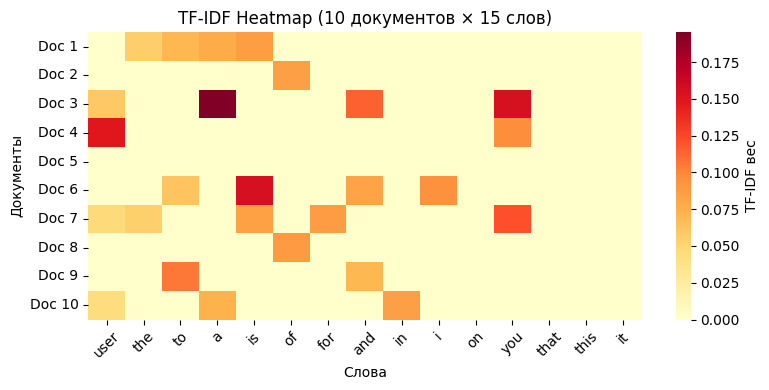

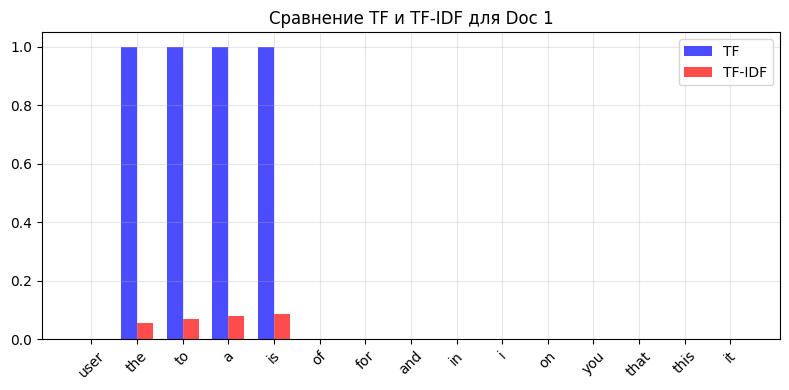

In [9]:
# Задача 2.1: Примените TF-IDF к BoW представлению (макс. балл == 2)
# - Используйте TfidfModel из gensim
# - Получите TF-IDF векторы для каждого документа

from gensim.models import TfidfModel

# создаем TF-IDF модель
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("\nTF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")
    if i == 5:  # только 5 доков
        break


def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)

# Задача 2.2: Проанализируйте веса TF-IDF (макс. балл == 3)
# - Для каждого слова вычислите: (макс. балл == 2)
#   * TF (term frequency) в каждом документе
#   * DF (document frequency) во всем корпусе
#   * IDF (inverse document frequency)
#   * значение TF-IDF
# - Сохраните результат в *.сsv (макс. балл == 1)
# - Прикрепите *.csv в ваш репозиторий

# TF
tf_df = pd.DataFrame(bow_matrix, columns=[dictionary[i] for i in range(len(dictionary))])
tf_df.index = [f"Doc {i+1}" for i in range(len(tf_df))]

# DF
df_counts = (tf_df > 0).sum(axis=0)

# IDF
num_docs = len(tf_df)
idf_values = np.log((num_docs + 1) / (df_counts + 1)) + 1

# Средние TF-IDF веса по корпусу
tfidf_mean = tfidf_matrix.mean(axis=0)



tfidf_analysis = pd.DataFrame({
    'Word': [dictionary[i] for i in range(len(dictionary))],
    'DF': df_counts.values,
    'IDF': idf_values,
    'Avg_TF-IDF': tfidf_mean
}).sort_values('Avg_TF-IDF', ascending=False)

# Сохраненение в CSV
tfidf_analysis.to_csv("tfidf_analysis.csv", index=False, encoding='utf-8-sig')
print("\nФайл 'tfidf_analysis.csv' сохранён.")

print("\nТоп-10 слов по среднему TF-IDF:")
print(tfidf_analysis.head(10))


#Визуализации

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap (10 документов × 15 самых значимых слов)
words = [dictionary[i] for i in range(len(dictionary))]
doc_names = [f"Doc {i+1}" for i in range(len(tfidf_corpus))]

tfidf_df = pd.DataFrame(tfidf_matrix, columns=words, index=doc_names)
top_words = tfidf_analysis.head(15)['Word']
subset_tfidf = tfidf_df[top_words].iloc[:10]

plt.figure(figsize=(8, 4))
sns.heatmap(subset_tfidf, cmap='YlOrRd', annot=False, cbar_kws={'label': 'TF-IDF вес'})
plt.title('TF-IDF Heatmap (10 документов × 15 слов)')
plt.xlabel('Слова')
plt.ylabel('Документы')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Сравнение TF и TF-IDF для одного документа
doc_idx = 0
x_pos = np.arange(len(top_words))
width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x_pos - width/2, tf_df[top_words].iloc[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_df[top_words].iloc[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, top_words, rotation=45)
plt.legend()
plt.title(f"Сравнение TF и TF-IDF для {doc_names[doc_idx]}")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```